In [1]:
import json
import pymongo
import certifi
import pandas
import seaborn as sns

# Retrieve credemtials for SQL Server from our credentials file
with open('C:\\Jodi_BC\\DA 320\\Week 5\\Secrets.json') as f:
    data = json.load(f)
    mongo_connection_string = data['MongoDB']

# Fetch the database names "DA320"
client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())
da320_database = client['DA320']
metacritic_data = da320_database['metacritic_new_2']
metacritic = pandas.DataFrame(metacritic_data.find())

In [2]:
# Convert release dates into actual dates and gather year/month
metacritic.release_date = pandas.to_datetime(metacritic.release_date)
metacritic['year'] = metacritic.release_date.dt.year
metacritic['month'] = metacritic.release_date.dt.month
metacritic.metascore = pandas.to_numeric(metacritic.metascore)
metacritic.head()

,_id,title,release_date,description,metascore,image_url,year,month
0,6371a311ef5cd209c61ed91d,"Crouching Tiger, Hidden Dragon",2000-12-08,"In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...,2000,12
1,6371a311ef5cd209c61ed91e,Yi Yi,2000-10-06,This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...,2000,10
2,6371a311ef5cd209c61ed91f,Beau Travail,2000-03-31,The soldiers of a small French Foreign Legion ...,91,https://static.metacritic.com/images/products/...,2000,3
3,6371a311ef5cd209c61ed920,Almost Famous,2000-09-13,"In the 1970's, a high school boy (Fugit) is gi...",90,https://static.metacritic.com/images/products/...,2000,9
4,6371a311ef5cd209c61ed921,Chicken Run,2000-06-21,A claymation spoof of classic prison-camp flic...,88,https://static.metacritic.com/images/products/...,2000,6


In [10]:
# Check the number of rows and columns in the dataframe
metacritic.shape

(8786, 8)

In [11]:
# Check the column info of the dataframe
metacritic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8786 entries, 0 to 8785
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   _id           8786 non-null   object        
 1   title         8786 non-null   object        
 2   release_date  8786 non-null   datetime64[ns]
 3   description   8786 non-null   object        
 4   metascore     8786 non-null   int64         
 5   image_url     8786 non-null   object        
 6   year          8786 non-null   int64         
 7   month         8786 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 549.2+ KB


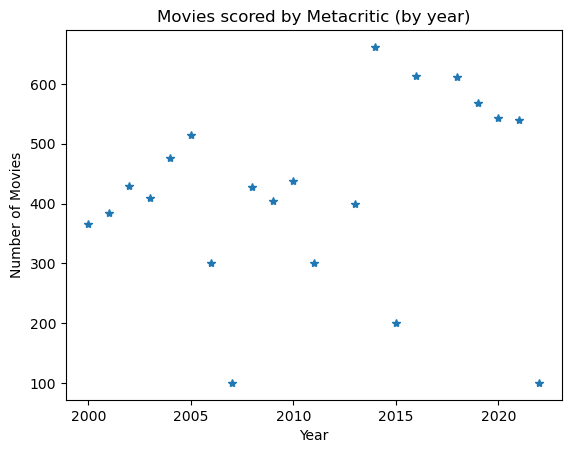

In [5]:
from matplotlib import pyplot
from matplotlib.ticker import FormatStrFormatter

# Set up labels on the axes
pyplot.title('Movies scored by Metacritic (by year)')
pyplot.xlabel('Year')
pyplot.ylabel('Number of Movies')
             
# Count movies measured by metacritic by year and plot the results
df = metacritic['release_date'].groupby(metacritic.year).agg('count')
pyplot.plot(df, '*')
pyplot.show()

We can see that the greatest number of movie occurs in the year 2014.  To test that, I will run number of movies by year.

In [45]:
# Let's validate the chart above showing movies scored by metacritic by year
df

year
2000    365
2001    385
2002    430
2003    409
2004    476
2005    515
2006    300
2007    100
2008    428
2009    404
2010    437
2011    300
2013    400
2014    662
2015    200
2016    613
2018    611
2019    569
2020    543
2021    539
2022    100
Name: release_date, dtype: int64

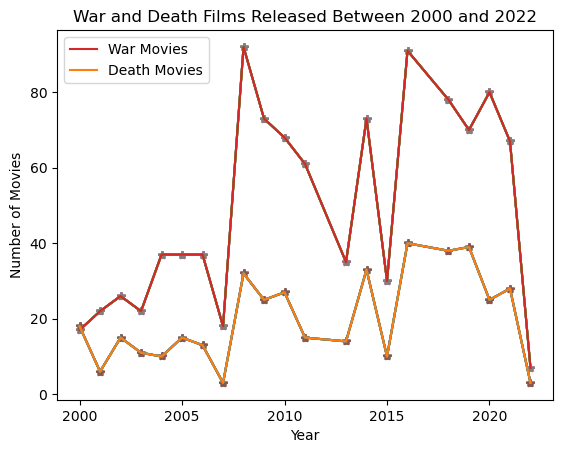

In [6]:
scores_war = metacritic[metacritic['description'].str.contains("war")].groupby(metacritic.year).agg('count')
scores_death = metacritic[metacritic['description'].str.contains("death")].groupby(metacritic.year).agg('count')


# Axis labels
pyplot.title('War and Death Films Released Between 2000 and 2022')
pyplot.xlabel('Year')
pyplot.ylabel('Number of Movies')

# Counting war and death films measured by metacritic by year, and plotting the results
pyplot.plot(scores_war, '*')
pyplot.plot(scores_death, '*')
pyplot.plot(scores_war, label='War Movies')
pyplot.plot(scores_death, label='Death Movies')
pyplot.legend(loc='upper left')

# Code to reduce repeating lables in the legend
# Source: https://stackoverflow.com/questions/13588920/stop-matplotlib-repeating-labels-in-legend
handles, labels = pyplot.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
pyplot.legend(by_label.values(), by_label.keys())

pyplot.show()

The chart above shows that 2008 and 2016 were years with a high amount of war movies.  Why where they so poplular during these years? The War on Iraq was during 2003 and 2011 and I tend to think it's because war movies feature a storyline with the families and loved ones waiting at home or the connections made among “battle buddies” who serve together. They remind us of the humanity of our warriors. War movies often have a romance story line about those seperated by war, and this makes this genre of movies popular to viewers. 

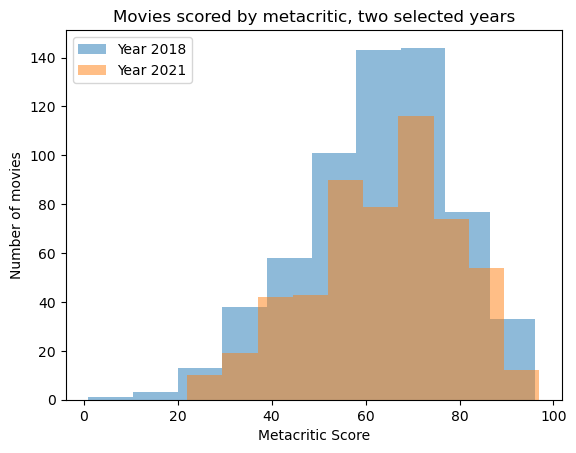

In [9]:
# Retrieve metascore for two different years
scores_2018 = metacritic[metacritic['year'] == 2018].metascore
scores_2021 = metacritic[metacritic['year'] == 2021].metascore

# Plot into buckets
pyplot.title("Movies scored by metacritic, two selected years")
pyplot.xlabel('MetaScore')
pyplot.ylabel('Number of movies')
pyplot.hist(scores_2018, alpha=0.5, label='Year 2018')
pyplot.hist(scores_2021, alpha=0.5, label='Year 2021')
pyplot.legend(loc='upper left')
pyplot.show()

Since a a Metascore is a weighted average of reviews from top critics and publications for a given movie, we can see in the chart above that both years for 2018 and 2021 had a similar score outcome with the scores averageing 70 at the peak number of movies. 

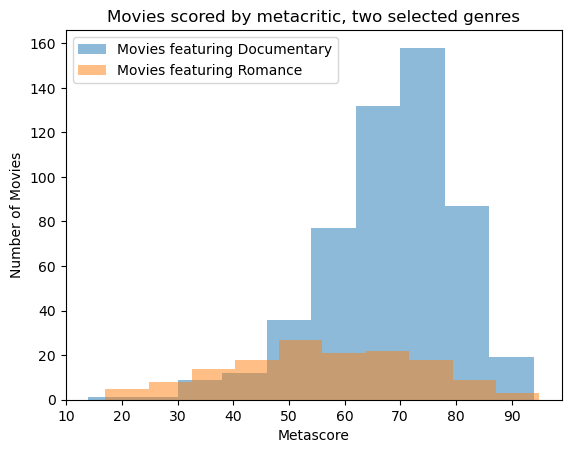

In [44]:
# Retrieve metascore for two different years
scores_documentary = metacritic[metacritic['description'].str.contains("documentary")].metascore
scores_romance = metacritic[metacritic['description'].str.contains("romance")].metascore

# Plot into buckets
pyplot.title("Movies scored by metacritic, two selected genres")
pyplot.xlabel('Metascore')
pyplot.ylabel('Number of Movies')
pyplot.hist(scores_documentary, alpha=0.5, label='Movies featuring Documentary')
pyplot.hist(scores_romance, alpha=0.5, label='Movies featuring Romance')
pyplot.legend(loc='upper left')
pyplot.show()

With the chart analysis above we can see that the documentary movies compared against romance films score the highest Metascore.  